# EDA

In [14]:
import numpy as np
import pandas as pd
import re
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [15]:
#DB CONNECTION

import psycopg2
from psycopg2 import sql
from psycopg2.extensions import adapt, register_adapter, AsIs
from sqlalchemy import create_engine,text
import getpass
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
database = 'f24t03'
user = 'jsmm8'
password = getpass.getpass("Type password and hit enter: ")



Type password and hit enter: ········


In [ ]:
#Create the connection and extract data from 'race_data_processed' table
try:
    conn = psycopg2.connect(database=database,
                            user=user,
                            host='pgsql',
                            password=password)
    print("I am able to connect to the database")
except Exception as e:
    print("I am unable to connect to the database:", e)
    raise

# Define the query to select all data from the race_data_processed table
query = "SELECT * FROM race_data_processed;"

# Use pandas to read the SQL query into a DataFrame
try:
    df_race = pd.read_sql(query, conn)
    print("Data extracted successfully!")
except Exception as e:
    print("Error extracting data:", e)
finally:
    # Close the connection
    conn.close()


# Display the DataFrame
df_race.shape

I am able to connect to the database
Data extracted successfully!


(24105, 22)

In [18]:
#check sample
df_race.head()

,geo_id,total_population,shannon_index,simpsons_index,richness,simpson_dominance,berger_parker_dominance,simpson_evenness,year,block_group,...,state,group_classification,hispanic_or_latino,asian,black,native,other,pac_isl,two_or_more_races,white
0,1500000US290019501001,1121,0.079,0.044,0.500,0.956,0.978,0.059,2022,Block Group 1,...,Missouri,white Dominant with low diversity,0.005,0.000,0.000,0.000,0.005,0.000,0.013,1.000
1,1500000US290019501002,1589,0.059,0.034,0.375,0.966,0.983,0.050,2022,Block Group 2,...,Missouri,white Dominant with low diversity,0.000,0.004,0.000,0.000,0.000,0.000,0.013,1.000
2,1500000US290019501003,961,0.271,0.245,0.625,0.755,0.858,0.306,2022,Block Group 3,...,Missouri,white Dominant with high diversity,0.154,0.000,0.001,0.004,0.000,0.000,0.004,0.988
3,1500000US290019502001,1031,0.287,0.200,0.625,0.800,0.892,0.250,2022,Block Group 1,...,Missouri,white Dominant with high diversity,0.062,0.014,0.000,0.000,0.000,0.014,0.030,0.997
4,1500000US290019502002,998,0.057,0.037,0.250,0.963,0.981,0.075,2022,Block Group 2,...,Missouri,white Dominant with low diversity,0.000,0.000,0.000,0.000,0.000,0.000,0.019,1.000


In [19]:

# Rename the 'Group_Classification' column to a new name
df_race.rename(columns={'group_classification': 'dominant_race'}, inplace=True)


In [20]:
#Check sample
df_race.head(2)

,geo_id,total_population,shannon_index,simpsons_index,richness,simpson_dominance,berger_parker_dominance,simpson_evenness,year,block_group,...,state,dominant_race,hispanic_or_latino,asian,black,native,other,pac_isl,two_or_more_races,white
0,1500000US290019501001,1121,0.079,0.044,0.500,0.956,0.978,0.059,2022,Block Group 1,...,Missouri,white Dominant with low diversity,0.005,0.000,0.0,0.0,0.005,0.0,0.013,1.0
1,1500000US290019501002,1589,0.059,0.034,0.375,0.966,0.983,0.050,2022,Block Group 2,...,Missouri,white Dominant with low diversity,0.000,0.004,0.0,0.0,0.000,0.0,0.013,1.0


In [21]:
#Check columns
df_race.columns

Index(['geo_id', 'total_population', 'shannon_index', 'simpsons_index',
       'richness', 'simpson_dominance', 'berger_parker_dominance',
       'simpson_evenness', 'year', 'block_group', 'census_tract', 'county',
       'state', 'dominant_race', 'hispanic_or_latino', 'asian', 'black',
       'native', 'other', 'pac_isl', 'two_or_more_races', 'white'],
      dtype='object')

In [22]:
#get unique race columns
df_race['dominant_race'].unique()

array(['white Dominant with low diversity',
       'white Dominant with high diversity',
       'hispanic_or_latino Dominant with low diversity',
       'Mixed Race Dominant', 'black Dominant with low diversity',
       'No Population Exists',
       'hispanic_or_latino Dominant with high diversity',
       'black Dominant with high diversity',
       'asian Dominant with low diversity',
       'pac_isl Dominant with low diversity',
       'two_or_more_races Dominant with low diversity',
       'native Dominant with low diversity',
       'asian Dominant with high diversity'], dtype=object)

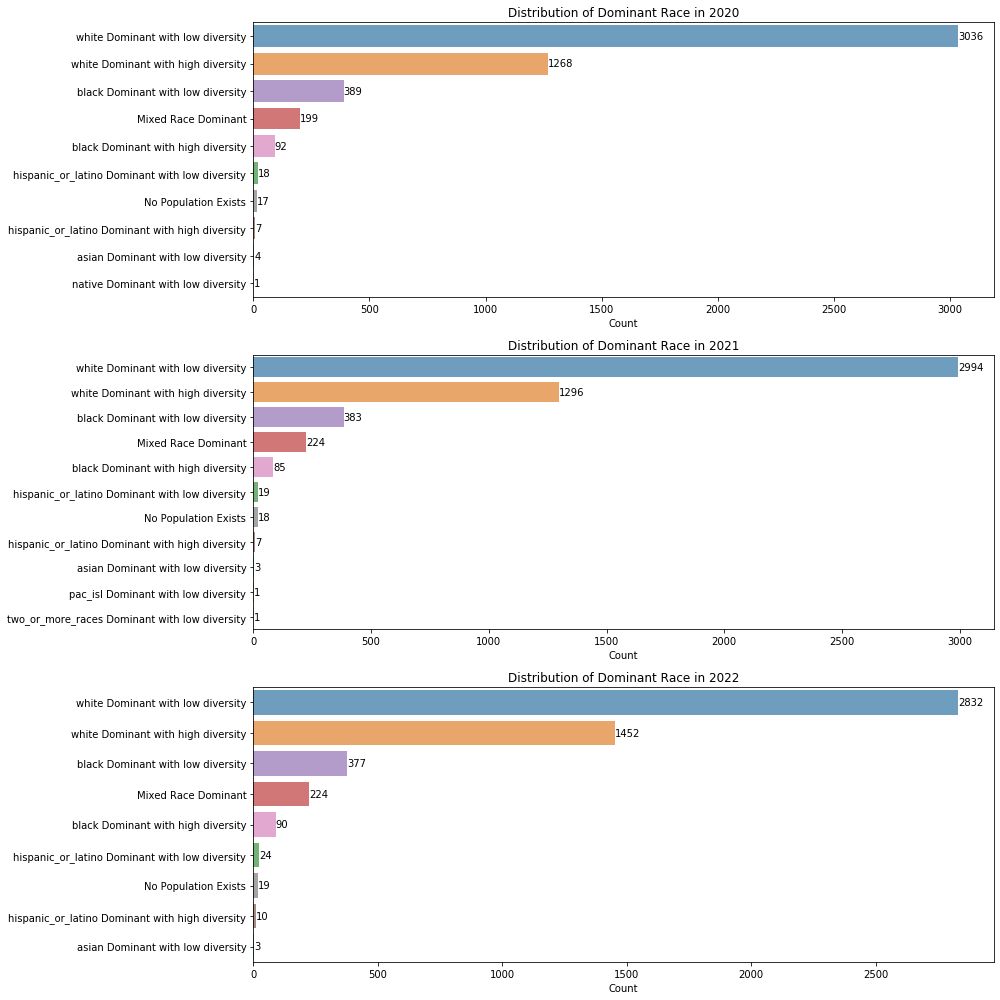

In [23]:
# Define a color-blind-friendly palette for each race category
color_palette = {
    'white Dominant with low diversity': '#1f77b4',            # blue
    'white Dominant with high diversity': '#ff7f0e',           # orange
    'hispanic_or_latino Dominant with low diversity': '#2ca02c', # green
    'Mixed Race Dominant': '#d62728',                          # red
    'black Dominant with low diversity': '#9467bd',            # purple
    'No Population Exists': '#7f7f7f',                         # gray
    'hispanic_or_latino Dominant with high diversity': '#8c564b', # brown
    'black Dominant with high diversity': '#e377c2',           # pink
    'asian Dominant with low diversity': '#17becf',            # teal
    'pac_isl Dominant with low diversity': '#bcbd22',          # yellow-green
    'two_or_more_races Dominant with low diversity': '#9edae5', # light blue
    'native Dominant with low diversity': '#f7b6d2',           # light pink
    'asian Dominant with high diversity': '#c5b0d5'            # light purple
}

# Filter the DataFrame for the years of interest
years = [2020, 2021, 2022]
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 14))

# Create a count plot for each year with reversed axes (horizontal)
for i, year in enumerate(years):
    df_year = df_race[df_race['year'] == year]
    ax = axes[i]
    
    # Apply the custom color palette to the count plot with horizontal bars
    sns.countplot(data=df_year, y='dominant_race', order=df_year['dominant_race'].value_counts().index, ax=ax, palette=color_palette,alpha = 0.7)
    
    # Add title and labels
    ax.set_title(f'Distribution of Dominant Race in {year}')
    ax.set_ylabel('')
    ax.set_xlabel('Count')
    
    # Annotate bars with counts
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', 
                    (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.), 
                    ha='left', va='center')

plt.tight_layout()
plt.show()

* Block groups having white dominant race with low diversity has decreased about 5% from 2020 to 2022
* Block groups having white dominant race with high diversity has increased about 15% from 2020 to 2022

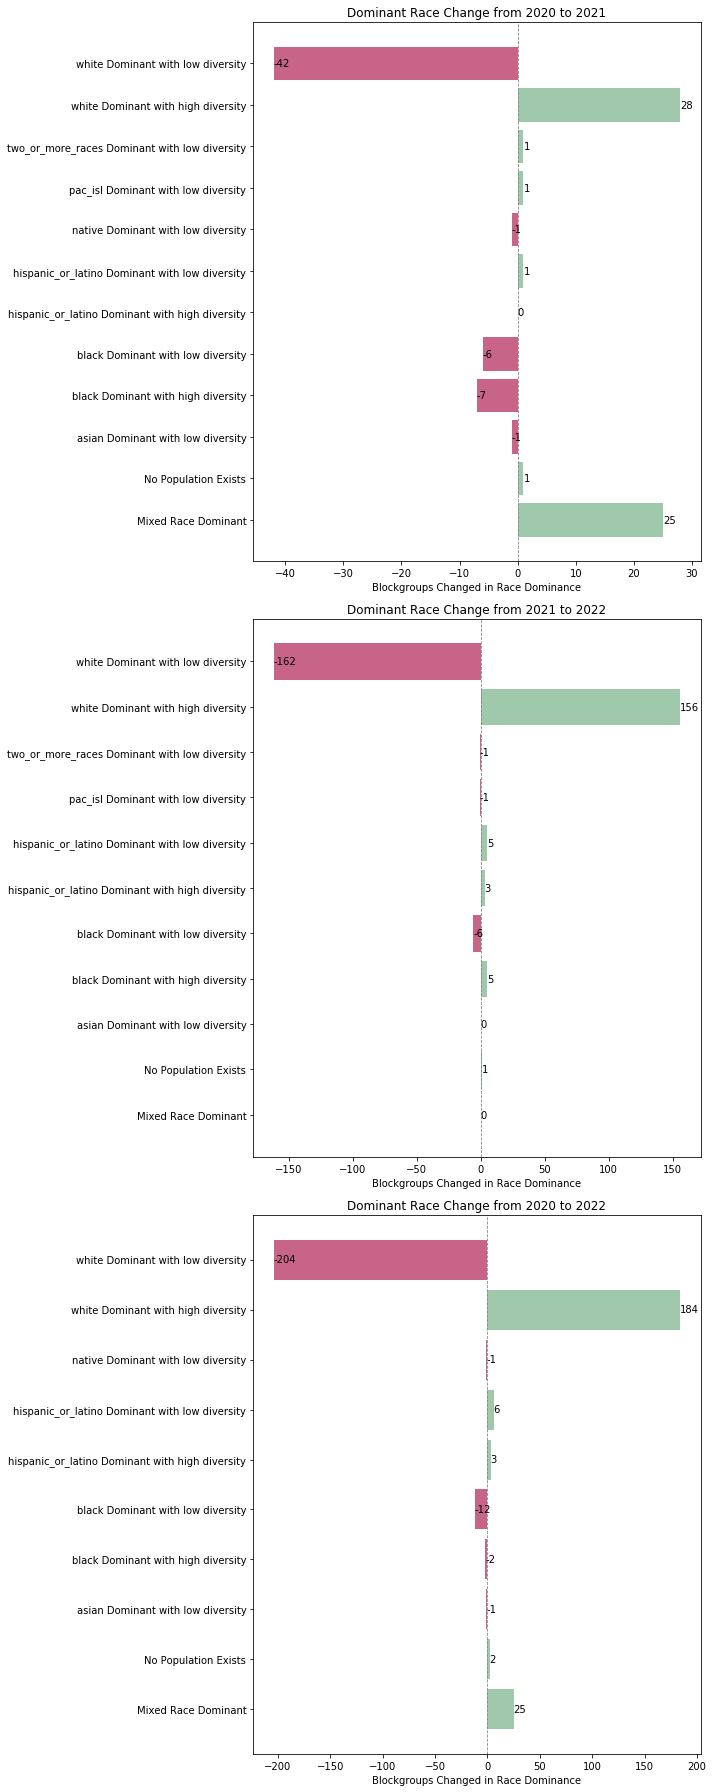

In [24]:
# Define the years
years = [2020, 2021, 2022]

# Initialize a figure with 3 subplots (1 column, 3 rows)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 25))

# Define color-blind friendly colors for positive and negative values
negative_color = '#B32357'  
positive_color = '#78B389'  

# Loop through the pairs of years for comparison
for i, (year1, year2) in enumerate([(2020, 2021), (2021, 2022), (2020, 2022)]):
    
    # Count occurrences for each year
    df_year1 = df_race[df_race['year'] == year1]
    df_year2 = df_race[df_race['year'] == year2]
    
    race_counts1 = df_year1['dominant_race'].value_counts()
    race_counts2 = df_year2['dominant_race'].value_counts()
    
    # Create a DataFrame to compare the two years
    comparison_df = pd.DataFrame({
        str(year1): race_counts1,
        str(year2): race_counts2
    }).fillna(0)

    # Calculate raw change
    comparison_df['Change'] = comparison_df[str(year2)] - comparison_df[str(year1)]
    
    # Plotting (horizontal bar chart)
    ax = axes[i]
    bars = ax.barh(comparison_df.index, comparison_df['Change'], 
                   color=comparison_df['Change'].apply(lambda x: positive_color if x > 0 else negative_color),alpha = 0.7)

    # Add raw numbers on top of the bars (horizontal bars)
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{int(width)}',  # Display integer value
                    xy=(width, bar.get_y() + bar.get_height() / 2),  # Position on the bar
                    ha='left', va='center', fontsize=10)

    # Add title and labels
    ax.set_title(f'Dominant Race Change from {year1} to {year2}')
    ax.set_xlabel('Blockgroups Changed in Race Dominance')
    ax.set_ylabel('')
    ax.axvline(0, color='gray', linewidth=0.8, linestyle='--')  # Line at 0 for reference
    ax.set_yticklabels(comparison_df.index, rotation=0)

plt.tight_layout()
plt.show()

* 204 blockgroups has a left shift(decline in dominance) which has dominant race as white with low diversity
* 184 blockgroups has a right shift(rice in dominance) which has dominant race as white with high diversity

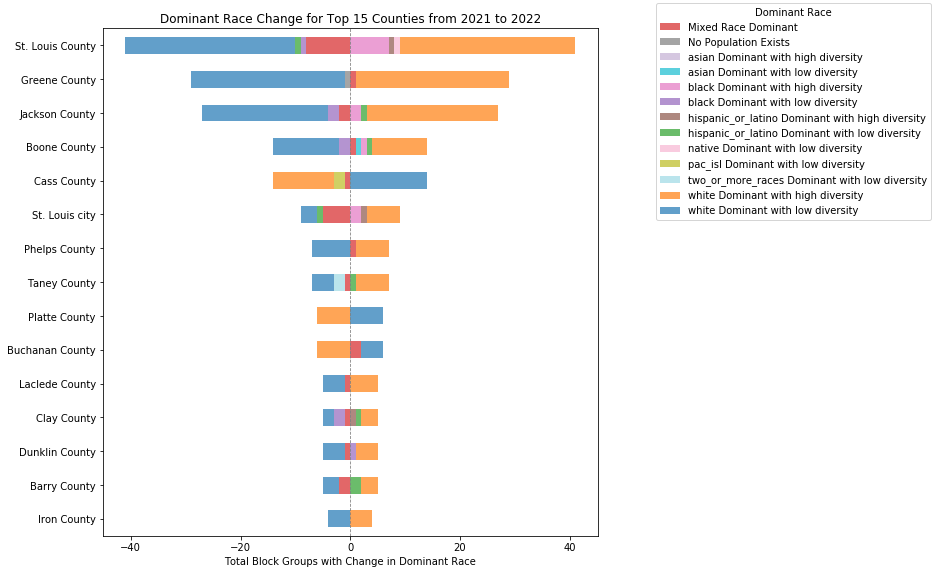

In [25]:
#Group by county and year to get the count of each dominant race
county_distribution = df_race.groupby(['county', 'year', 'dominant_race']).size().unstack(fill_value=0)

#Calculate year-on-year change for each county
change_df = county_distribution.diff().fillna(0)  # Change from the previous year

# Filter for the year 2022 to get the change from 2021 to 2022
change_2021_2022 = change_df.xs(2022, level='year') - change_df.xs(2021, level='year')

# Calculate total change for each county in 2022 and sort in descending order
total_change_2022 = change_2021_2022.abs().sum(axis=1).reset_index(name='Total_Change')
sorted_total_change_2022 = total_change_2022.sort_values(by='Total_Change', ascending=False)

#Select the top 15 counties by total change
top_15_counties = sorted_total_change_2022.nlargest(15, 'Total_Change')['county']

# Reorder change_2021_2022 to match sorted order of top 15 counties
# Reverse the order to have the highest change at the top
change_2021_2022_top_15 = change_2021_2022.loc[top_15_counties].iloc[::-1]

# Visualize the changes for top 15 counties
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting as a horizontal bar chart for top 15 counties
change_2021_2022_top_15.plot(
    kind='barh', 
    stacked=True, 
    color=[color_palette[col] for col in change_2021_2022_top_15.columns],
    ax=ax, legend=False,alpha = 0.7
)
# Add labels and title
ax.set_title('Dominant Race Change for Top 15 Counties from 2021 to 2022')
ax.set_xlabel('Total Block Groups with Change in Dominant Race')
ax.set_ylabel('')
ax.axvline(0, color='gray', linewidth=0.8, linestyle='--')  # Reference line at 0

# Create a legend outside the plot
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', title='Dominant Race', bbox_to_anchor=(1.3, 1))

plt.tight_layout(rect=[0, 0, 0.85, 1])  
plt.show()


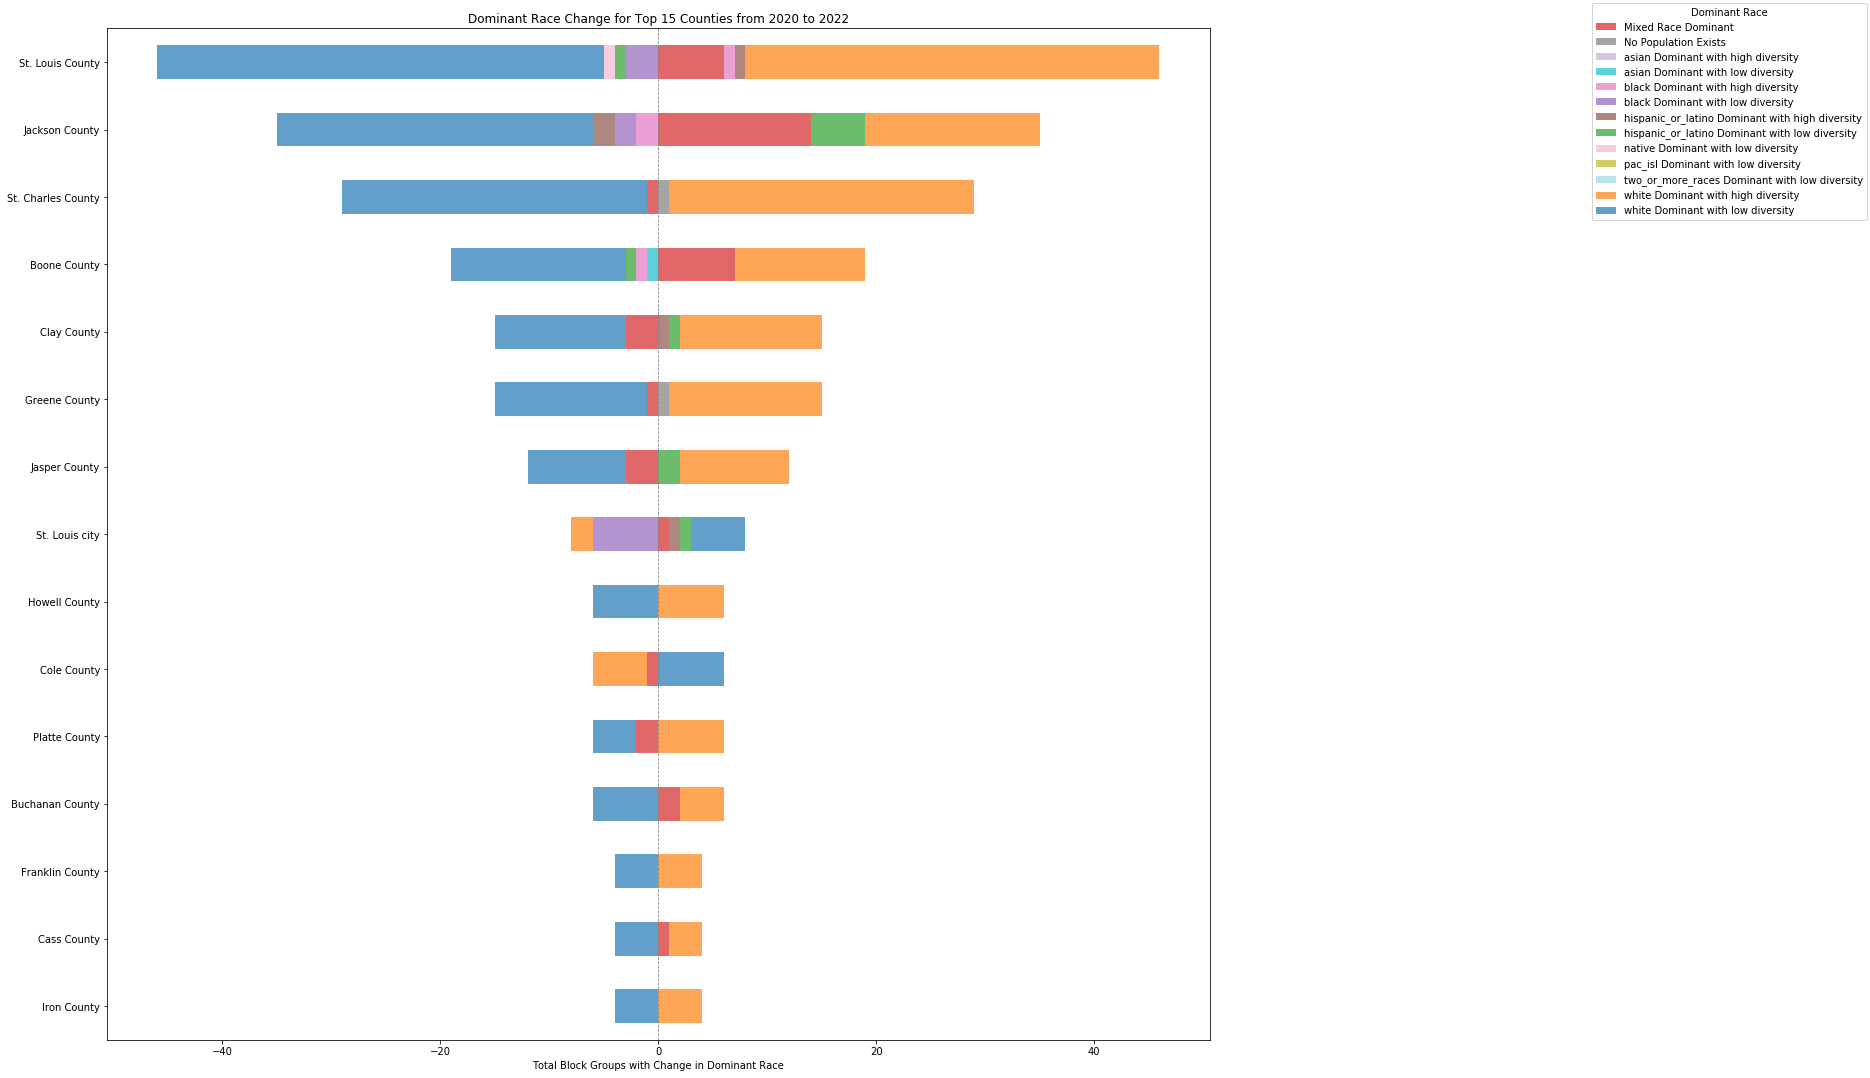

In [26]:
#Group by county and year to get the count of each dominant race
county_distribution = df_race.groupby(['county', 'year', 'dominant_race']).size().unstack(fill_value=0)

#Calculate the change from 2020 to 2022 for each county
change_2020_2022 = county_distribution.xs(2022, level='year') - county_distribution.xs(2020, level='year')

# Calculate total absolute change for each county from 2020 to 2022 and sort in descending order
total_change_2020_2022 = change_2020_2022.abs().sum(axis=1).reset_index(name='Total_Change')
sorted_total_change_2020_2022 = total_change_2020_2022.sort_values(by='Total_Change', ascending=False)

# Select the top 15 counties by total change
top_15_counties_2022 = sorted_total_change_2020_2022.nlargest(15, 'Total_Change')['county']

# Reorder change_2020_2022 to match sorted order of top 15 counties
# Reverse the order to have the highest change at the top
change_2020_2022_top_15 = change_2020_2022.loc[top_15_counties_2022].iloc[::-1]

# Visualize the changes for top 15 counties
fig, ax = plt.subplots(figsize=(20, 15))

# Plotting as a horizontal bar chart for top 15 counties

change_2020_2022_top_15.plot(
    kind='barh', 
    stacked=True, 
    color=[color_palette[col] for col in change_2020_2022_top_15.columns],
    ax=ax, legend=False,alpha = 0.7
)

# Add labels and title
ax.set_title('Dominant Race Change for Top 15 Counties from 2020 to 2022')
ax.set_xlabel('Total Block Groups with Change in Dominant Race')
ax.set_ylabel('')
ax.axvline(0, color='gray', linewidth=0.8, linestyle='--')  # Reference line at 0

# Create a legend outside the plot
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', title='Dominant Race', bbox_to_anchor=(1.3, 1))

plt.tight_layout(rect=[0, 0, 0.85, 1])  
plt.show()


In [ ]:
#Create the connection and extract data from 'income_data_processed' table
try:
    conn = psycopg2.connect(database=database,
                            user=user,
                            host='pgsql',
                            password=password)
    print("I am able to connect to the database")
except Exception as e:
    print("I am unable to connect to the database:", e)
    raise

# Define the query to select all data from the income_data_processed table
query = "SELECT * FROM income_data_processed where year in (2020,2021,2022);"

# Use pandas to read the SQL query into a DataFrame
try:
    df_income = pd.read_sql(query, conn)
    print("Data extracted successfully!")
except Exception as e:
    print("Error extracting data:", e)
finally:
    # Close the connection
    conn.close()


# Display the DataFrame
df_income.shape

I am able to connect to the database
Data extracted successfully!


(15093, 24)

In [28]:
#Check sample
df_income.head()

,geo_id,median_income,year,block_group,census_tract,county,state,gini_coefficient,est_less_than_10k,est_10to15k,...,est_35to40k,est_40to45k,est_45to50k,est_50to60k,est_60to75k,est_75to100k,est_100to125k,est_125to150k,est_150to200k,est_more_than_200k
0,1500000US290019501001,56313.0,2020,Block Group 1,Census Tract 9501,Adair County,Missouri,0.48,0.00,0.07,...,0.14,0.19,0.11,0.70,0.24,0.39,0.31,0.14,0.05,0.03
1,1500000US290019501002,57167.0,2020,Block Group 2,Census Tract 9501,Adair County,Missouri,0.47,0.04,0.59,...,0.04,0.16,0.09,0.25,0.46,0.40,0.26,0.12,0.24,0.02
2,1500000US290019501003,48409.0,2020,Block Group 3,Census Tract 9501,Adair County,Missouri,0.50,0.13,0.25,...,0.10,0.09,0.31,0.43,0.38,0.38,0.09,0.16,0.15,0.09
3,1500000US290019502001,34911.0,2020,Block Group 1,Census Tract 9502,Adair County,Missouri,0.47,0.36,0.44,...,0.20,0.07,0.12,0.13,0.23,0.55,0.24,0.00,0.00,0.03
4,1500000US290019502002,54141.0,2020,Block Group 2,Census Tract 9502,Adair County,Missouri,0.50,0.19,0.40,...,0.14,0.18,0.04,0.41,0.35,0.38,0.25,0.17,0.33,0.11


In [29]:
#Merge income and race
merged_df = pd.merge(df_income[['geo_id', 'year', 'gini_coefficient','median_income']],
                     df_race[['geo_id', 'year', 'dominant_race']],
                     on=['geo_id', 'year'],
                     how='inner')  

#check sample
merged_df.head()

,geo_id,year,gini_coefficient,median_income,dominant_race
0,1500000US290019501001,2020,0.48,56313.0,white Dominant with low diversity
1,1500000US290019501002,2020,0.47,57167.0,white Dominant with low diversity
2,1500000US290019501003,2020,0.50,48409.0,white Dominant with high diversity
3,1500000US290019502001,2020,0.47,34911.0,white Dominant with low diversity
4,1500000US290019502002,2020,0.50,54141.0,white Dominant with low diversity


In [30]:
#get only 2020,2021 and 2022 year data
merged_df = merged_df[merged_df['year'].isin([2020, 2021, 2022])]

#check info
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15093 entries, 0 to 15092
Data columns (total 5 columns):
geo_id              15093 non-null object
year                15093 non-null int64
gini_coefficient    15093 non-null float64
median_income       15093 non-null float64
dominant_race       15093 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 707.5+ KB


In [31]:
#get unique dominant races
merged_df['dominant_race'].unique()

array(['white Dominant with low diversity',
       'white Dominant with high diversity',
       'hispanic_or_latino Dominant with low diversity',
       'black Dominant with high diversity',
       'asian Dominant with low diversity', 'Mixed Race Dominant',
       'black Dominant with low diversity', 'No Population Exists',
       'hispanic_or_latino Dominant with high diversity',
       'native Dominant with low diversity',
       'pac_isl Dominant with low diversity',
       'two_or_more_races Dominant with low diversity'], dtype=object)

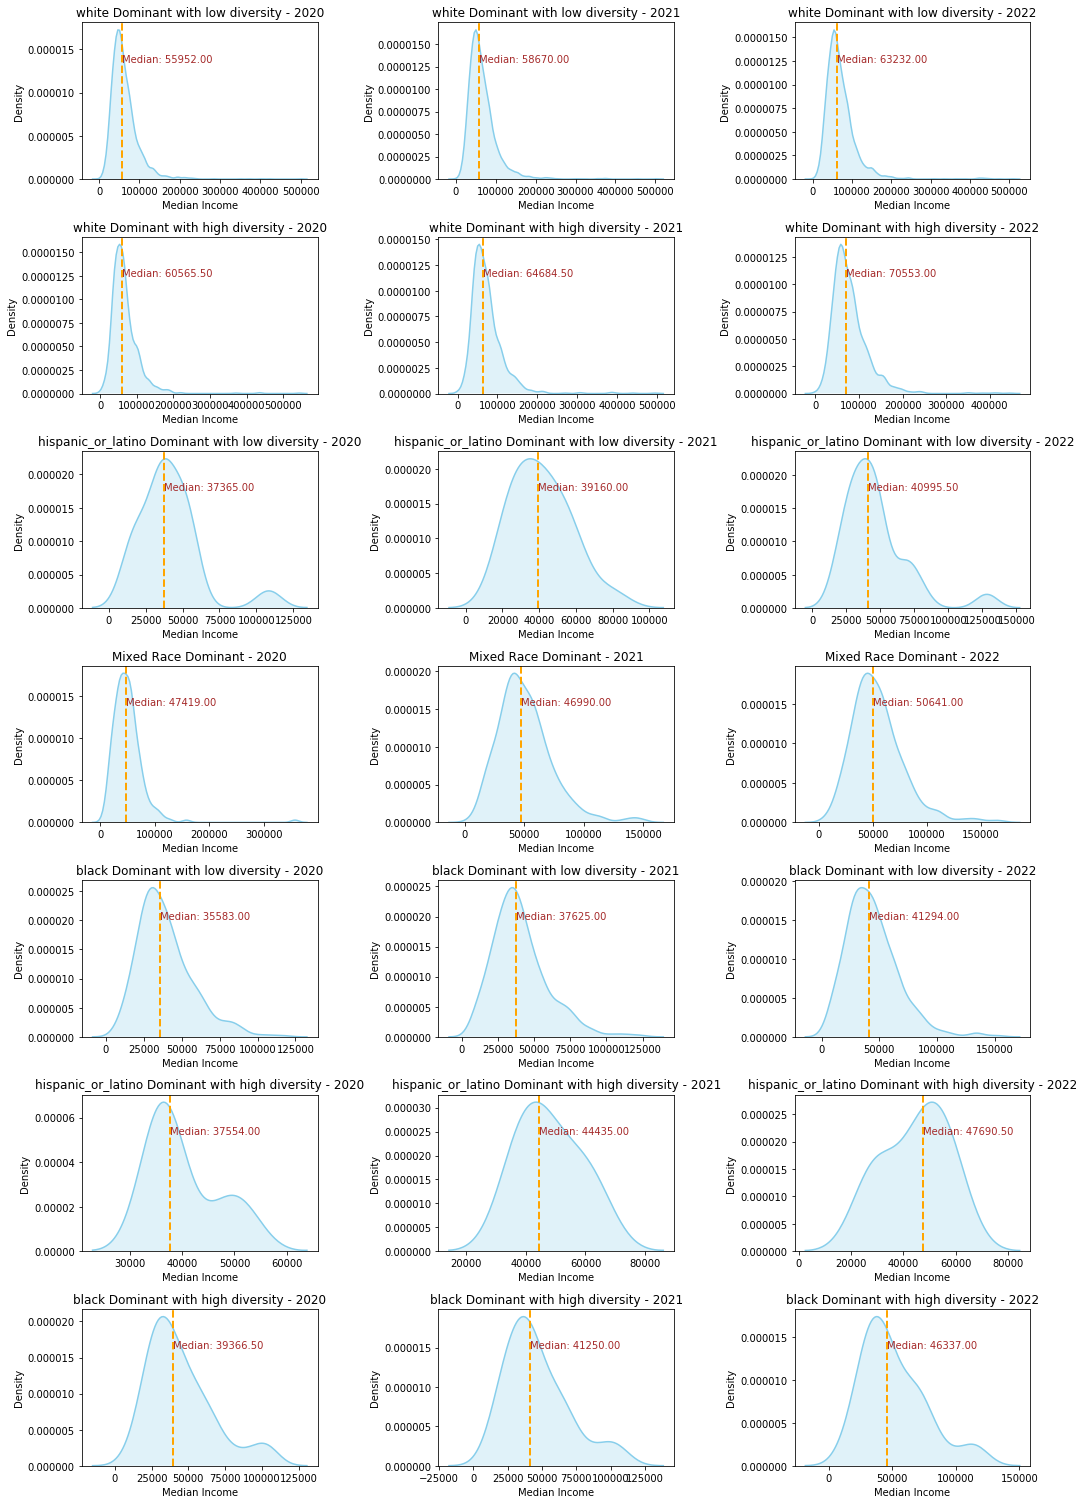

In [32]:
# Define race groups and years
race_groups = [
    'white Dominant with low diversity',
    'white Dominant with high diversity',
    'hispanic_or_latino Dominant with low diversity',
    'Mixed Race Dominant',
    'black Dominant with low diversity',
    'hispanic_or_latino Dominant with high diversity',
    'black Dominant with high diversity'
]
years = merged_df['year'].unique()

# Set the figure size for the plots
plt.figure(figsize=(15, 21))

# Create subplots for each race and year combination
for i, race in enumerate(race_groups):
    for j, year in enumerate(years):
        ax = plt.subplot(len(race_groups), len(years), i * len(years) + j + 1)
        
        # Filter the DataFrame for the specific year and race group
        subset = merged_df[(merged_df['year'] == year) & (merged_df['dominant_race'] == race)]
        
        # Plot density only if there is data for the current race and year
        if not subset.empty:
            # Create a density plot
            sns.kdeplot(subset['median_income'], shade=True, color='skyblue', ax=ax,legend=False)
            
            # Calculate and plot the median income line
            median_income = subset['median_income'].median()
            ax.axvline(median_income, color='orange', linestyle='dashed', linewidth=2)
            
            # Annotate the median value
            ax.text(median_income, ax.get_ylim()[1] * 0.8, f'Median: {median_income:.2f}', 
                     color='brown', ha='left', va='top')
        
        # Set the title and labels
        ax.set_title(f'{race} - {year}')
        ax.set_xlabel('Median Income')
        ax.set_ylabel('Density')


plt.tight_layout()
plt.show()


* In the above plot we observe that the block groups having the dominant race groups with various diversities have a rise in income by 10% minimum from 2020 to 2022.
* A high increase in income of 15% is observed in block groups with dominant white race with high diversity from 2020 to 2022.
* Mixed race dominant block groups are having a drop in median income from 2020 to 2021 and later increased in 2022 but, still it is having around 8% increase when compared to 2020. Mixed dominant race blockgroup have the lowest % of rise in median income within 2 years.

In [33]:
# extracting Race groups to analyze as other race groups have very less instances of 1 or 2 only.
race_groups = ['white Dominant with low diversity',
       'white Dominant with high diversity',
       'hispanic_or_latino Dominant with low diversity',
       'Mixed Race Dominant', 'black Dominant with low diversity',
       'hispanic_or_latino Dominant with high diversity',
       'black Dominant with high diversity']

# Create an empty DataFrame to store the results
median_income_summary = pd.DataFrame()

# Loop through each race group
for race in race_groups:
    # Group by year and calculate the median income for the current race group
    median_data = merged_df.groupby('year').apply(
        lambda x: x.loc[x['dominant_race'].str.strip() == race, 'median_income'].median()
    )
    
    # Rename the series for clarity
    median_data.name = race
    
    # Add to the summary DataFrame
    median_income_summary = pd.concat([median_income_summary, median_data], axis=1)

# Reset index to make 'year' a column
median_income_summary.reset_index(inplace=True)

# Rename the 'index' column to 'year'
median_income_summary.rename(columns={'index': 'year'}, inplace=True)

#get summary
median_income_summary


,year,white Dominant with low diversity,white Dominant with high diversity,hispanic_or_latino Dominant with low diversity,Mixed Race Dominant,black Dominant with low diversity,hispanic_or_latino Dominant with high diversity,black Dominant with high diversity
0,2020,55952.0,60565.5,37365.0,47419.0,35583.0,37554.0,39366.5
1,2021,58670.0,64684.5,39160.0,46990.0,37625.0,44435.0,41250.0
2,2022,63232.0,70553.0,40995.5,50641.0,41294.0,47690.5,46337.0


In [34]:
# Create a new DataFrame to store growth rates
growth_rate_summary = median_income_summary.copy()

# Initialize a list to hold the years compared
years_compared = [None]  # Start with None for the first year

# Loop through each race group column to calculate the growth rate
for race in growth_rate_summary.columns[1:]:  # Skip the 'year' column
    growth_rate = growth_rate_summary[race].pct_change() * 100  # Calculate percentage change
    growth_rate_summary[race + ' Growth Rate'] = growth_rate  # Add to the summary DataFrame

# Now create the years_compared list with appropriate comparisons
for i in range(1, len(growth_rate_summary)):
    comparison = f"{growth_rate_summary['year'][i-1]} vs {growth_rate_summary['year'][i]}"
    years_compared.append(comparison)

# Fill the first entry with None, so it aligns with the growth rates
years_compared = [None] + years_compared[1:]  # Retain the first None for the first year

# Assign the new years_compared column to match the DataFrame length
growth_rate_summary['years_compared'] = years_compared

# Display the growth rate summary DataFrame
growth_rate_summary

,year,white Dominant with low diversity,white Dominant with high diversity,hispanic_or_latino Dominant with low diversity,Mixed Race Dominant,black Dominant with low diversity,hispanic_or_latino Dominant with high diversity,black Dominant with high diversity,white Dominant with low diversity Growth Rate,white Dominant with high diversity Growth Rate,hispanic_or_latino Dominant with low diversity Growth Rate,Mixed Race Dominant Growth Rate,black Dominant with low diversity Growth Rate,hispanic_or_latino Dominant with high diversity Growth Rate,black Dominant with high diversity Growth Rate,years_compared
0,2020,55952.0,60565.5,37365.0,47419.0,35583.0,37554.0,39366.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,2021,58670.0,64684.5,39160.0,46990.0,37625.0,44435.0,41250.0,4.857735,6.800902,4.803961,-0.904701,5.738695,18.322948,4.784525,2020 vs 2021
2,2022,63232.0,70553.0,40995.5,50641.0,41294.0,47690.5,46337.0,7.775695,9.072498,4.687181,7.769738,9.751495,7.326432,12.332121,2021 vs 2022


In [35]:
# Create a copy of the DataFrame to work on
growth_rate_summary = median_income_summary.copy()

# Initialize a list to hold the years compared
years_compared = [None]  # Start with None for the first year

# List of race categories
race_columns = [
    'white Dominant with low diversity', 
    'white Dominant with high diversity',
    'hispanic_or_latino Dominant with low diversity',
    'Mixed Race Dominant',
    'black Dominant with low diversity',
    'hispanic_or_latino Dominant with high diversity',
    'black Dominant with high diversity'
]

# Calculate growth rates for each racial group
for race in race_columns:
    growth_rate = growth_rate_summary[race].pct_change() * 100  # Calculate percentage change
    growth_rate_summary[race + ' Growth Rate'] = growth_rate  # Add to the summary DataFrame

# Create years_compared for the existing records
for i in range(1, len(growth_rate_summary)):
    comparison = f"{growth_rate_summary['year'][i-1]} vs {growth_rate_summary['year'][i]}"
    years_compared.append(comparison)

# Fill the first entry with None to align with the growth rates
years_compared = [None] + years_compared[1:]  # Retain the first None for the first row

# Calculate the growth rate from 2020 to 2022 for each race category
growth_rate_2020_to_2022 = {}
for race in race_columns:
    growth_rate_2020_to_2022[race + ' Growth Rate'] = (
        (growth_rate_summary[race][2] - growth_rate_summary[race][0]) / growth_rate_summary[race][0] * 100
    )

# Add the new row for the 2020 vs 2022 comparison
new_row = {
    'year': 2022,  # Keep the year for the new record
    **{race: growth_rate_summary[race][2] for race in race_columns},  # Last known values for each category
    **growth_rate_2020_to_2022,  # Include calculated growth rates
    'years_compared': '2020 vs 2022'  # New comparison
}

# Append the new row to the DataFrame
growth_rate_summary = growth_rate_summary.append(new_row, ignore_index=True)

# Update the years_compared list to reflect the new entry
years_compared.append('2020 vs 2022')

# Update the years_compared column in the DataFrame
growth_rate_summary['years_compared'] = years_compared

# Display the growth rate summary DataFrame
growth_rate_summary


,year,white Dominant with low diversity,white Dominant with high diversity,hispanic_or_latino Dominant with low diversity,Mixed Race Dominant,black Dominant with low diversity,hispanic_or_latino Dominant with high diversity,black Dominant with high diversity,white Dominant with low diversity Growth Rate,white Dominant with high diversity Growth Rate,hispanic_or_latino Dominant with low diversity Growth Rate,Mixed Race Dominant Growth Rate,black Dominant with low diversity Growth Rate,hispanic_or_latino Dominant with high diversity Growth Rate,black Dominant with high diversity Growth Rate,years_compared
0,2020,55952.0,60565.5,37365.0,47419.0,35583.0,37554.0,39366.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,2021,58670.0,64684.5,39160.0,46990.0,37625.0,44435.0,41250.0,4.857735,6.800902,4.803961,-0.904701,5.738695,18.322948,4.784525,2020 vs 2021
2,2022,63232.0,70553.0,40995.5,50641.0,41294.0,47690.5,46337.0,7.775695,9.072498,4.687181,7.769738,9.751495,7.326432,12.332121,2021 vs 2022
3,2022,63232.0,70553.0,40995.5,50641.0,41294.0,47690.5,46337.0,13.011152,16.490411,9.716312,6.794745,16.049799,26.991798,17.706680,2020 vs 2022


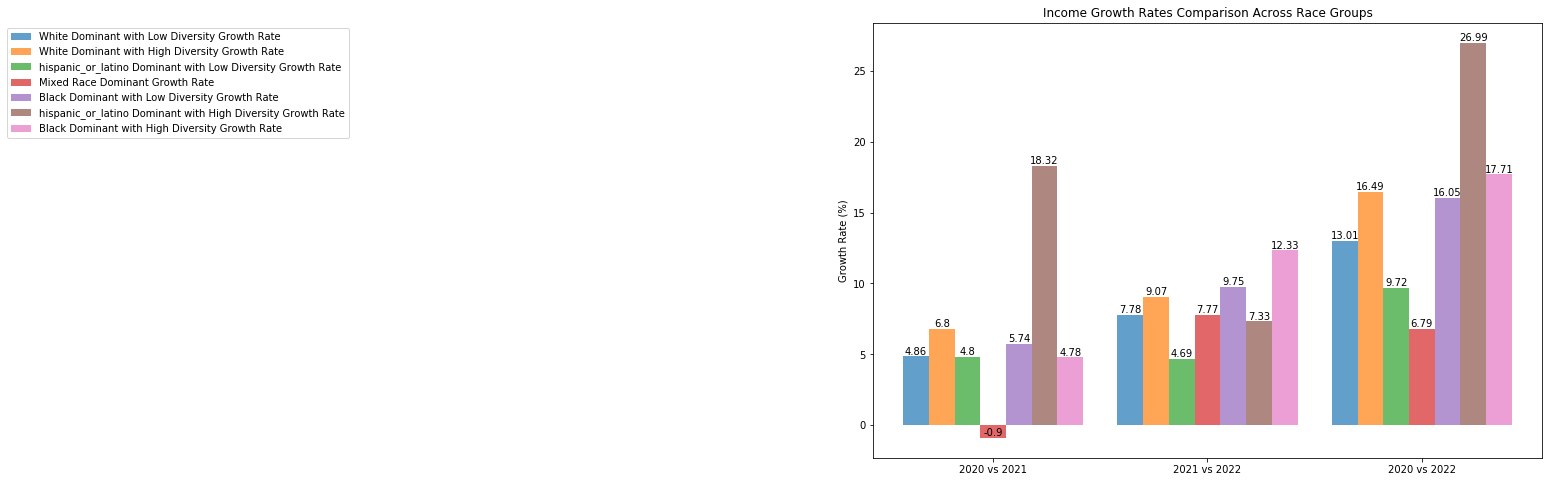

In [36]:
# Filtering data for plotting
growth_rate_data = growth_rate_summary.dropna(subset=[
    'white Dominant with low diversity Growth Rate', 
    'white Dominant with high diversity Growth Rate', 
    'hispanic_or_latino Dominant with low diversity Growth Rate', 
    'Mixed Race Dominant Growth Rate', 
    'black Dominant with low diversity Growth Rate', 
    'hispanic_or_latino Dominant with high diversity Growth Rate', 
    'black Dominant with high diversity Growth Rate'
])
# Sorting the data alphabetically by the column names (categories)
growth_rate_data_sorted = growth_rate_data.sort_index(axis=1)  # Sorting the columns alphabetically

# Set the figure size
plt.figure(figsize=(12, 8))

# Set the bar width and index for the grouped bars
bar_width = 0.12
index = np.arange(len(growth_rate_data_sorted))

# Plot the growth rates for each race category (now using the sorted data)
bars1 = plt.bar(index, growth_rate_data_sorted['white Dominant with low diversity Growth Rate'], bar_width, label='White Dominant with Low Diversity Growth Rate', alpha=0.7, color=color_palette['white Dominant with low diversity'])
bars2 = plt.bar(index + bar_width, growth_rate_data_sorted['white Dominant with high diversity Growth Rate'], bar_width, label='White Dominant with High Diversity Growth Rate', alpha=0.7, color=color_palette['white Dominant with high diversity'])
bars3 = plt.bar(index + 2 * bar_width, growth_rate_data_sorted['hispanic_or_latino Dominant with low diversity Growth Rate'], bar_width, label='hispanic_or_latino Dominant with Low Diversity Growth Rate', alpha=0.7, color=color_palette['hispanic_or_latino Dominant with low diversity'])
bars4 = plt.bar(index + 3 * bar_width, growth_rate_data_sorted['Mixed Race Dominant Growth Rate'], bar_width, label='Mixed Race Dominant Growth Rate', alpha=0.7, color=color_palette['Mixed Race Dominant'])
bars5 = plt.bar(index + 4 * bar_width, growth_rate_data_sorted['black Dominant with low diversity Growth Rate'], bar_width, label='Black Dominant with Low Diversity Growth Rate', alpha=0.7, color=color_palette['black Dominant with low diversity'])
bars6 = plt.bar(index + 5 * bar_width, growth_rate_data_sorted['hispanic_or_latino Dominant with high diversity Growth Rate'], bar_width, label='hispanic_or_latino Dominant with High Diversity Growth Rate', alpha=0.7, color=color_palette['hispanic_or_latino Dominant with high diversity'])
bars7 = plt.bar(index + 6 * bar_width, growth_rate_data_sorted['black Dominant with high diversity Growth Rate'], bar_width, label='Black Dominant with High Diversity Growth Rate', alpha=0.7, color=color_palette['black Dominant with high diversity'])

# Adding values on top of the bars for each group
for bars in [bars1, bars2, bars3, bars4, bars5, bars6, bars7]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Labels and title
plt.xlabel('')
plt.ylabel('Growth Rate (%)')
plt.title('Income Growth Rates Comparison Across Race Groups')
plt.xticks(index + 3 * bar_width, growth_rate_data_sorted['years_compared'])  # Center the x-ticks based on grouped bars
plt.legend(loc='upper left', bbox_to_anchor=(-1.3, 1))

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:

#Create the connection and extract data from 'education_data_processed' table
try:
    conn = psycopg2.connect(database=database,
                            user=user,
                            host='pgsql',
                            password=password)
    print("I am able to connect to the database")
except Exception as e:
    print("I am unable to connect to the database:", e)
    raise

# Define the query to select all data from the education_data_processed table
query = "SELECT * FROM education_data_processed where year in (2020,2021,2022);"

# Use pandas to read the SQL query into a DataFrame
try:
    df_edu = pd.read_sql(query, conn)
    print("Data extracted successfully!")
except Exception as e:
    print("Error extracting data:", e)
finally:
    # Close the connection
    conn.close()


# Display the DataFrame
df_edu.shape

I am able to connect to the database
Data extracted successfully!


(15093, 14)

In [38]:
#merge education data now
merged_df2 = pd.merge(merged_df[['geo_id', 'year', 'gini_coefficient','dominant_race','median_income']],
                     df_edu[['geo_id', 'year', 'gini_education','education_score_category','higher_education_proportion','weighted_education_score']],
                     on=['geo_id', 'year'],
                     how='inner')  

In [ ]:
#Create the connection and extract data from 'housing_stats_data' table
try:
    conn = psycopg2.connect(database=database,
                            user=user,
                            host='pgsql',
                            password=password)
    print("I am able to connect to the database")
except Exception as e:
    print("I am unable to connect to the database:", e)
    raise

# Define the query to select all data from the housing_stats_data table
query = "SELECT  * FROM housing_stats_data WHERE year IN (2020, 2021, 2022);"

# Use pandas to read the SQL query into a DataFrame
try:
    df_house = pd.read_sql(query, conn)
    print("Data extracted successfully!")
except Exception as e:
    print("Error extracting data:", e)
finally:
    # Close the connection
    conn.close()


# Display the DataFrame
df_house.shape

I am able to connect to the database
Data extracted successfully!


(15093, 45)

In [40]:
#Merge housing data now
merged_df_full = pd.merge(
    merged_df2[['geo_id', 'year', 'gini_coefficient', 'dominant_race', 'median_income', 
                'gini_education', 'education_score_category', 'higher_education_proportion', 
                'weighted_education_score']],
    df_house[['geo_id', 'year', 'median_value',
       'pct_occupied', 'pct_vacant', 'pct_owner_occupied', 'pct_rental', 'housing_category']],
    on=['geo_id', 'year'],
    how='inner'
)

#round off columns
merged_df_full['pct_occupied'] = merged_df_full['pct_occupied'].round(2) 
merged_df_full['pct_vacant'] = merged_df_full['pct_vacant'].round(2) 
merged_df_full['pct_owner_occupied'] = merged_df_full['pct_owner_occupied'].round(2) 
merged_df_full['pct_rental'] = merged_df_full['pct_rental'].round(2) 
#Check sample
merged_df_full.head()

,geo_id,year,gini_coefficient,dominant_race,median_income,gini_education,education_score_category,higher_education_proportion,weighted_education_score,median_value,pct_occupied,pct_vacant,pct_owner_occupied,pct_rental,housing_category
0,1500000US290019501001,2020,0.48,white Dominant with low diversity,56313.0,0.41,Medium,0.21,4.76,142300,77.11,22.89,97.10,2.90,Occupied-Owner
1,1500000US290019501002,2020,0.47,white Dominant with low diversity,57167.0,0.48,Medium,0.28,5.11,148300,85.01,14.99,87.79,12.21,Occupied-Owner
2,1500000US290019501003,2020,0.50,white Dominant with high diversity,48409.0,0.52,Medium,0.16,4.77,86100,67.74,32.26,89.64,10.36,Occupied-Owner
3,1500000US290019502001,2020,0.47,white Dominant with low diversity,34911.0,0.47,Low,0.13,4.48,75300,74.82,25.18,82.22,17.78,Occupied-Owner
4,1500000US290019502002,2020,0.50,white Dominant with low diversity,54141.0,0.57,Medium,0.31,5.37,92300,68.92,31.08,88.06,11.94,Occupied-Owner


In [41]:
#get stats
merged_df_full.describe()

,year,gini_coefficient,median_income,gini_education,higher_education_proportion,weighted_education_score,median_value,pct_occupied,pct_vacant,pct_owner_occupied,pct_rental
count,15093.000000,15093.000000,15093.00000,15093.000000,15093.000000,15093.000000,1.509300e+04,15093.000000,15093.000000,15093.000000,15093.000000
mean,2021.000000,0.428183,65354.28225,0.529443,0.282342,5.186368,1.748226e+05,87.147841,12.434747,67.149469,32.433119
std,0.816524,0.105132,37992.68269,0.125217,0.216925,0.840070,1.216701e+05,14.038564,12.879948,25.474852,25.188809
min,2020.000000,-1.000000,0.00000,-1.000000,-1.000000,-1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,0.410000,42183.00000,0.480000,0.130000,4.650000,9.890000e+04,81.180000,1.980000,51.080000,12.010000
50%,2021.000000,0.440000,57841.00000,0.530000,0.230000,5.080000,1.523000e+05,90.670000,9.220000,73.120000,26.670000
75%,2022.000000,0.470000,79408.00000,0.590000,0.400000,5.670000,2.171000e+05,97.820000,18.630000,87.740000,48.430000
max,2022.000000,0.550000,544450.00000,0.880000,1.000000,7.690000,2.265809e+06,100.000000,84.280000,100.000000,100.000000


In [45]:
#extract only 2022 data 
data = merged_df_full[merged_df_full['year'] == 2022]

#remove data containg median income 0 or near 0 (As this value is added while computing gini to avoid infinite result)
data = data[data['median_value'] > 0.000000e+00]

#remove data whith income 0
data = data[data['median_income'] != 0]
#restricting the house price values to less than 1M to visualize the scattered plot
data = data[data['median_value'] < 1000000]

#now check stats
data.describe()

,year,gini_coefficient,median_income,gini_education,higher_education_proportion,weighted_education_score,median_value,pct_occupied,pct_vacant,pct_owner_occupied,pct_rental
count,4937.0,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2022.0,0.433071,70342.971035,0.535481,0.289425,5.219477,194495.669030,87.815594,12.184406,68.586575,31.413425
std,0.0,0.049188,39684.065463,0.082410,0.201457,0.745270,118663.340433,12.656091,12.656091,24.183843,24.183843
min,2022.0,0.090000,5931.000000,0.180000,0.000000,3.020000,5688.000000,15.900000,0.000000,0.250000,0.000000
25%,2022.0,0.410000,46000.000000,0.480000,0.140000,4.680000,114241.000000,81.700000,1.800000,53.050000,11.610000
50%,2022.0,0.440000,62083.000000,0.530000,0.240000,5.100000,169200.000000,90.930000,9.070000,74.090000,25.910000
75%,2022.0,0.470000,85547.000000,0.590000,0.400000,5.670000,242400.000000,98.200000,18.300000,88.390000,46.950000
max,2022.0,0.540000,508018.000000,0.860000,0.990000,7.610000,976000.000000,100.000000,84.100000,100.000000,99.750000


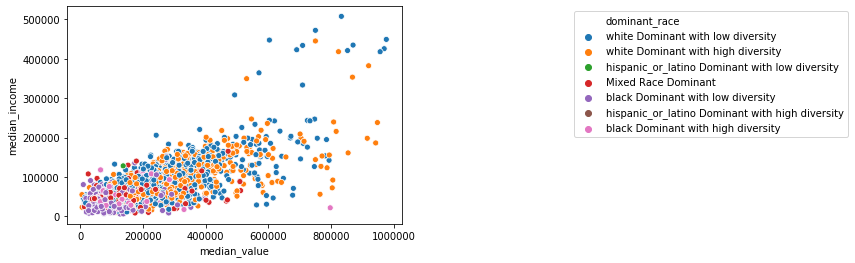

In [46]:
# scatterplot code
sns.scatterplot(data=data, x="median_value", y="median_income", hue='dominant_race')


plt.legend(loc='upper left', bbox_to_anchor=(1.5, 1))  # Moving the legend outside the plot


plt.tight_layout()

# Show the plot
plt.show()

* 1500000US295101278001 in st.louis city seems to be an outlier here as median incomes are around 20K but median house prices are around 800K.
* All higher valued house prices of above 500K are mostly white dominant race block groups, with some extreme high income and high home values are with low diversity blockgroups.